### Percentage of bachelor's degrees granted to women 1970-2012

[The Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can download the [dataset Randal compiled here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

women_degrees = pd.read_csv('/Users/jake/Dev/data/datasets/percent-bachelors-degrees-women-usa.csv')

In [4]:
women_degrees.iloc[:1]

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8


In [5]:
women_degrees.describe()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1990.500000,33.848165,33.685540,61.100000,49.429864,40.653471,56.216667,25.809524,76.356236,12.892857,66.186680,71.723810,82.983333,44.478571,31.304762,68.776190,76.085714,45.407143
std,12.267844,12.552731,9.574057,1.305336,10.087725,13.116109,8.698610,6.688753,2.212641,5.670824,1.950990,1.926682,2.914967,2.646262,9.000866,9.705463,5.879504,4.763653
min,1970.000000,4.229798,11.921005,58.600000,29.088363,9.064439,35.300000,13.600000,72.166525,0.800000,61.647206,69.000000,75.500000,38.000000,13.800000,44.400000,62.600000,36.100000
25%,1980.250000,30.840814,28.520709,60.200000,44.311821,37.390851,55.125000,19.125000,74.994573,10.625000,65.583807,70.125000,81.825000,42.875000,24.875000,65.550000,74.625000,43.825000
50%,1990.500000,33.317552,35.994852,61.300000,50.971469,47.210123,59.850000,27.300000,75.937020,14.100000,66.112018,71.150000,83.700000,44.900000,32.100000,72.750000,77.450000,45.300000
75%,2000.750000,45.663953,40.790605,62.000000,58.679194,48.876139,62.125000,29.775000,78.619420,16.950000,67.861247,73.875000,85.175000,46.500000,40.200000,76.925000,81.100000,49.375000
max,2011.000000,50.037182,44.499331,63.400000,62.169456,50.552335,64.600000,37.100000,79.618625,19.000000,68.894487,75.300000,86.500000,48.300000,42.200000,77.800000,82.100000,51.800000


Generate a line chart that visualizes the historical percentage of Biology degrees awarded to women:

- Set the x-axis to the Year column from women_degrees.
- Set the y-axis to the Biology column from women_degrees.

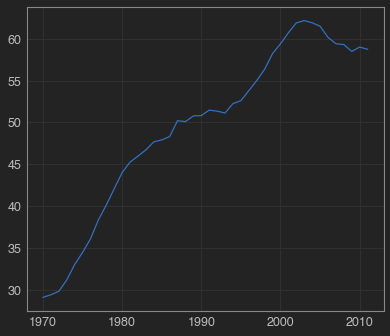

In [9]:
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()

From the plot, we can tell that Biology degrees increased steadily from 1970 and peaked in the early 2000's. We can also tell that the percentage has stayed above 50% since around 1987. While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

If we visualize the trend of Biology degrees awarded to men on the same plot, a viewer can observe the space between the lines for each gender. We can calculate the percentages of Biology degrees awarded to men by subtracting each value in the `Biology` column from `100`. Once we have the male percentages, we can generate two line charts as part of the same diagram.

Let's now create a diagram containing both the line charts we just described.

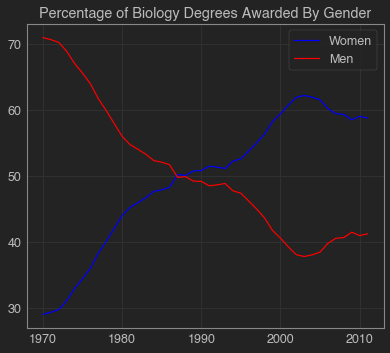

In [19]:
plt.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
plt.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='red', label='Men')
plt.legend(loc='upper right')
plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.show()


The chart containing both line charts tells a more complete story than the one containing just the line chart that visualized just the women percentages. This plot instead tells the story of two distinct periods. In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect. While a viewer could have reached the same conclusions using the individual line chart of just the women percentages, it would have required more effort and mental processing on their part.

Although our plot is better, it still contains some extra visual elements that aren't necessary to understand the data. We're interested in helping people understand the gender gap in different fields across time. These excess elements, sometimes known as [chartjunk](https://en.wikipedia.org/wiki/Chartjunk), increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts. In general, we want to maximize the [data-ink ratio](https://infovis-wiki.net/wiki/Data-Ink_Ratio), which is the fractional amount of the plotting area dedicated to displaying the data. 

Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends. Data ink includes any elements that display and depend on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers. As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots. We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story, because plots we create could end up telling the wrong story.

This principle was originally set forth by Edward Tufte, a pioneer of the field of data visualization. Tufte's first book, [The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi), is considered a bible among information designers. We cover some of the ideas presented in the book in this course, but we recommend going through the entire book for more depth.

To improve the data-ink ratio, let's make the following changes to the plot we created in the last step:

- Remove all of the axis tick marks.
- Hide the spines, which are the lines that connects the tick marks, on each axis.

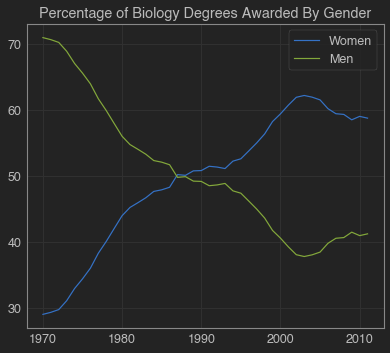

In [22]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')

ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc="upper right")

plt.show()

When a viewer is viewing our chart and trying to understand the insight we're presenting, the ticks and spines can get in the way. As we mentioned earlier, chartjunk becomes much more noticeable when you have multiple plots in the same chart. By keeping the axis tick labels but not the spines or tick marks, we strike an appropriate balance between hiding chartjunk and making the data visible.

In matplotlib, the spines are represented using the [matplotlib.spines.Spine](http://matplotlib.org/api/spines_api.html) class. When we create an Axes instance, four Spine objects are created for us. If you run `print(ax.spines)`, you'll get back a dictionary of the Spine objects:

In [23]:
print(ax.spines)

OrderedDict([('left', <matplotlib.spines.Spine object at 0x7fbfd207e210>), ('right', <matplotlib.spines.Spine object at 0x7fbfd212bc10>), ('bottom', <matplotlib.spines.Spine object at 0x7fbfd212b390>), ('top', <matplotlib.spines.Spine object at 0x7fbfd212bb10>)])


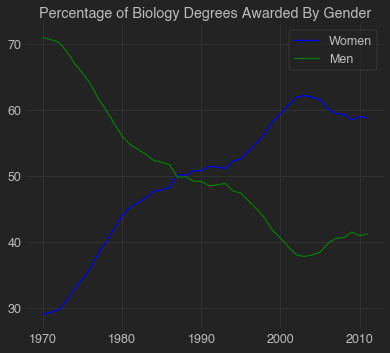

In [26]:
fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')

for key, spine in ax.spines.items():
    spine.set_visible(False)

ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc="upper right")

plt.show()

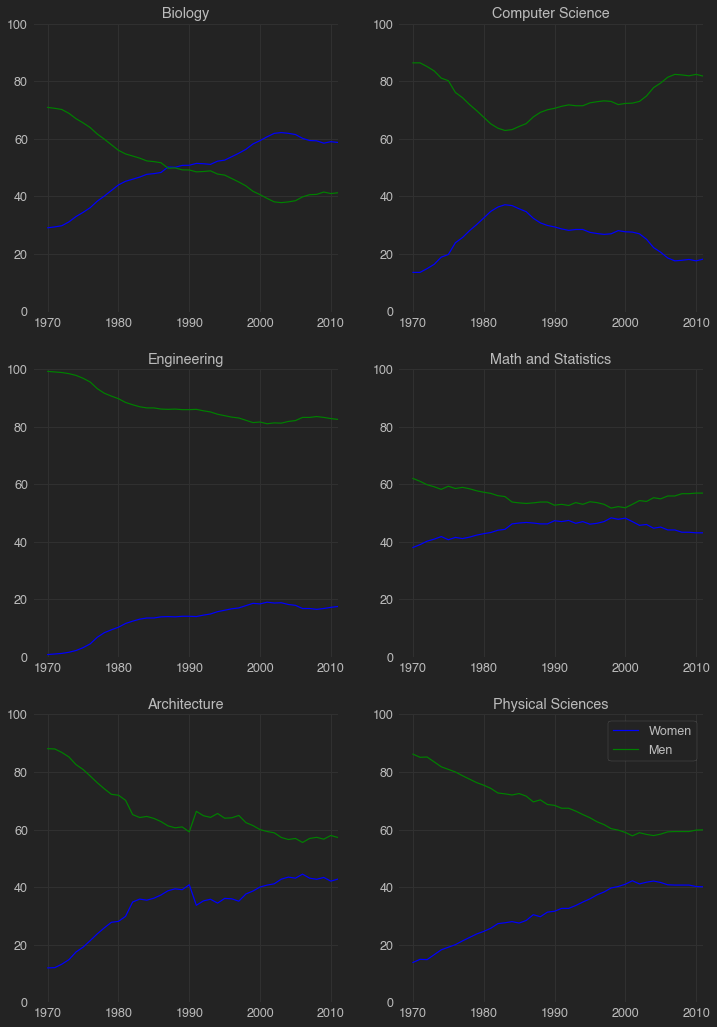

In [35]:
major_cats = [
    'Biology',
    'Computer Science',
    'Engineering',
    'Math and Statistics',
    'Architecture',
    'Physical Sciences'
]
fig = plt.figure(figsize=(12, 18))

for sp in range(0,len(major_cats)):
    ax = fig.add_subplot(3,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

By spending just a few seconds reading the chart, we can conclude that the gender gap in Computer Science and Engineering have big gender gaps, the gap in Biology and Math and Statistics is quite small and the gaps in Architecture and Physical Sciences is increasingly narrowing. In addition, the first two degree categories are dominated by men while the latter degree categories are much more balanced.

### Colour

Next we'll focus more directly on customizing colors, line widths, layout, and annotations to improve the ability for a viewer to extract insights from the charts.

So far, we've been using the [default matplotlib colors](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) to color the lines in line charts. When selecting colors, we need to be mindful of people who have some amount of color blindness. People who have color blindness have a decreased ability to distinguish between certain kinds of colors. The most common form of color blindness is red-green color blindness, where the person can't distinguish between red and green shades. Approximately 8% of men and 0.5% of women of Northern European descent suffer from red-green color blindness.

If we wanted to publish the data visualizations we create, we need to be mindful of color blindness. Thankfully, there are color palettes we can use that are friendly for people with color blindness. One of them is called Color Blind 10 and was released by Tableau, the company that makes the data visualization platform of the same name. Navigate to [this page](http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html) and select just the Color Blind 10 option from the list of palettes to see the ten colors included in the palette.